# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Budiman Nurhadi
- **Email:** almorpth@gmail.com
- **ID Dicoding:** budiman_nurhadi_IQsj

## Menentukan Pertanyaan Bisnis

- Q1: Bagaimana hubungan antara rating produk dan kategori produk dalam hal jumlah ulasan dan rating rata-rata, dan apakah kategori produk tertentu memiliki rating lebih tinggi daripada yang lain?
- Q2: Apa faktor-faktor yang paling berpengaruh terhadap total penjualan produk, berdasarkan harga, ulasan, dan kategori produk?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada analisa kali ini, saya menggunakan dataset **E-Commerce Brazil** yang dapat diakses melalui [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/). Dataset ini berisi lebih dari 100.000 pesanan yang terjadi pada periode 2016 hingga 2018 di berbagai marketplace di Brasil.

In [2]:
product_category_name_translation = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
products_df = products.merge(
    product_category_name_translation,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

products_df['product_category_name'] = products_df['product_category_name_english']
products_df = products_df.drop(columns=['product_category_name_english'])
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Pada tahap ini, saya menggabungkan dataset produk dengan file terjemahan kategori produk untuk mengganti nama kategori produk yang semula dalam bahasa Portugis menjadi bahasa Inggris. Setelah itu, kolom terjemahan yang tidak diperlukan dihapus, sehingga dataset produk kini memiliki informasi kategori yang lebih mudah dipahami untuk analisis lebih lanjut.


In [3]:
order_reviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

### Dokumentasi Proses Assessing Data

Pada tahap ini, saya melakukan pemeriksaan kualitas data untuk memastikan data siap digunakan dalam analisis. Berikut langkah-langkah yang dilakukan:

#### 1. **Memahami Struktur Dataset**
   - Dataset terdiri dari beberapa tabel, yang utama adalah produk dan penjualan, yang berisi informasi tentang kategori, ulasan, penjualan, harga, dan total penjualan.

#### 2. **Pemeriksaan Data yang Hilang**
   - Memeriksa apakah ada data yang hilang di kolom penting seperti skor ulasan, jumlah penjualan, dan kategori produk.
   - Menghapus atau mengisi data yang hilang sesuai kebutuhan.

#### 3. **Memeriksa Duplikasi**
   - Mengecek dan menghapus baris duplikat untuk memastikan data tidak ganda.

#### 4. **Validasi Tipe Data**
   - Memastikan kolom dengan data numerik seperti skor ulasan dan jumlah penjualan memiliki tipe data yang tepat.

#### 5. **Statistik Deskriptif**
   - Mengecek distribusi nilai dan mencari nilai ekstrem (outlier) yang mungkin mempengaruhi analisis.

#### 7. **Evaluasi Kelayakan Data**
   - Memastikan hanya data yang relevan yang digunakan untuk analisis lebih lanjut, dan menghapus yang tidak diperlukan.

Langkah-langkah ini membantu memastikan data yang digunakan akurat dan siap untuk analisis lebih lanjut.


#### products

In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [6]:
products_df.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [7]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### order_reviews

In [9]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


#### order_items

In [12]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Pada tahap ini, saya melakukan pembersihan data untuk memastikan data yang digunakan konsisten dan siap untuk dianalisis lebih lanjut. Berikut langkah-langkah pembersihan yang dilakukan:

#### 1. **Membersihkan Data pada Tabel Produk**
   - **Kategori Produk Kosong**: Menghapus baris dengan kategori produk kosong atau mengisi dengan kategori lain yang relevan jika memungkinkan.
   - **Panjang Nama dan Deskripsi Kosong**: Mengisi nilai kosong dengan panjang yang sesuai atau menghapus produk yang tidak lengkap.
   - **Foto Kosong**: Menghapus produk yang tidak memiliki foto atau mengisi dengan placeholder jika diperlukan.

#### 2. **Membersihkan Data pada Tabel Order-Item**
   - **Shipping Limit Date yang Salah Tipe Data**: Mengonversi kolom `shipping_limit_date` ke tipe data `datetime` yang sesuai.
   
#### 3. **Memperbaiki Tipe Data pada Tabel Order-Reviews**
   - **Creation Date dan Timestamp**: Mengubah kolom `creation_date` dan `timestamp` menjadi tipe data yang sesuai dengan format tanggal dan waktu (`datetime`).

#### 4. **Menangani Data Kosong pada Tabel Review**
   - **Review Comment Title dan Message Kosong**: Menghapus atau mengganti komentar kosong dengan nilai default, tergantung pada kebutuhan analisis.

Langkah-langkah ini membantu memastikan data yang digunakan lebih bersih, konsisten, dan siap untuk proses analisis selanjutnya.

#### products

In [15]:
products_df.dropna(subset=['product_category_name'], inplace=True)

In [16]:
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

In [17]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### order_reviews

In [18]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [20]:
order_reviews_df['review_comment_title'].fillna("No Title", inplace=True)
order_reviews_df['review_comment_message'].fillna("No Comment", inplace=True)

In [21]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### order_items

In [22]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [23]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

Pada tahap EDA (Exploratory Data Analysis), saya mulai dengan memeriksa distribusi data dan hubungan antar fitur yang relevan. Saya mengeksplorasi kolom-kolom seperti harga produk, jumlah ulasan, rating, dan jumlah penjualan untuk memahami pola yang ada. Visualisasi digunakan untuk menilai hubungan antara kategori produk dan rating, serta melihat apakah kategori tertentu memiliki rating yang lebih tinggi dibandingkan yang lain. Selain itu, saya juga melihat distribusi data berdasarkan kategori produk dan mengidentifikasi produk dengan ulasan dan penjualan tertinggi.


#### Merging Product Information with Order Items

Aktivitas ini menggabungkan informasi produk, seperti nama kategori produk, dengan data item pesanan. Data ini digunakan untuk menganalisis hubungan antara produk dan pesanan yang terkait.

In [24]:
product_orders_df = pd.merge(
    left=products_df[['product_id', 'product_category_name']],
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

product_orders_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


#### Calculating Total Sales and Sold Count by Category

Aktivitas ini menghitung total penjualan dan jumlah unit yang terjual per kategori produk. Data diambil dari dataframe `product_orders_df` yang berisi informasi mengenai produk yang terjual. Total penjualan dihitung dengan mengalikan jumlah unit yang terjual dengan harga produk. Setelah itu, data diurutkan berdasarkan jumlah unit yang terjual secara menurun untuk menunjukkan kategori dengan penjualan tertinggi.

In [25]:
bycategory_sales_df = product_orders_df.groupby(
    ['product_category_name']
).agg(
    sold_count=('product_id', 'size'),
    item_price=('price', 'first')
).reset_index()

bycategory_sales_df['total_sales'] = bycategory_sales_df['sold_count'] * bycategory_sales_df['item_price']

print(bycategory_sales_df.sort_values(by='sold_count', ascending=False))

        product_category_name  sold_count  item_price  total_sales
7              bed_bath_table       11115       71.99    800168.85
43              health_beauty        9670       29.90    289133.00
65             sports_leisure        8641       79.80    689551.80
39            furniture_decor        8334        9.99     83256.66
15      computers_accessories        7827       69.90    547107.30
..                        ...         ...         ...          ...
3       arts_and_craftmanship          24      238.00      5712.00
52                 la_cuisine          14      174.00      2436.00
11          cds_dvds_musicals          14       65.00       910.00
29  fashion_childrens_clothes           8       89.99       719.92
61      security_and_services           2      100.00       200.00

[71 rows x 4 columns]


#### Calculating Total Sales and Sold Count by Product

 Aktivitas ini menghitung jumlah unit yang terjual dan total penjualan untuk setiap produk. Dengan mengalikan jumlah produk yang terjual dengan harga produk, kita mendapatkan total penjualan untuk setiap produk.

In [26]:
byproduct_sales_df = product_orders_df.groupby(
    ['product_id']
).agg(
    sold_count=('product_id', 'size'),
    item_price=('price', 'first')
).reset_index()

byproduct_sales_df['total_sales'] = byproduct_sales_df['sold_count'] * byproduct_sales_df['item_price']

print(byproduct_sales_df.sort_values(by='sold_count', ascending=False))

                             product_id  sold_count  item_price  total_sales
21716  aca2eb7d00ea1a7b8ebd4e68314663af         527       69.90     36837.30
19387  99a4788cb24856965c36a24e339b6058         488       74.00     36112.00
8453   422879e10f46682990de24d770e7f83d         484       53.90     26087.60
7228   389d119b48cf3043d311335e499d9c6b         392       49.90     19560.80
6947   368c6c730842d78016ad823897a372db         388       49.90     19361.20
...                                 ...         ...         ...          ...
13794  6cc58e27cae22a37b784841f0e4fb647           1       24.99        24.99
13792  6cc2b92f841b20c5e39281a44a9c68bc           1      149.00       149.00
13791  6cc0a02127c60fc252540ccd8487763a           1       41.00        41.00
13787  6cbd4637b69fff7d983bb1a757febf71           1      356.49       356.49
32327  fffe9eeff12fcbd74a2f2b007dde0c58           1      249.99       249.99

[32328 rows x 4 columns]


#### Product Review Analysis and Sorting

Aktivitas ini bertujuan untuk menganalisis data ulasan produk dan mengurutkannya berdasarkan skor ulasan. Data diambil dari dataframe `product_reviews_df`, yang mencakup produk dan ulasan terkait. Hasil dari analisis ini akan menunjukkan produk dengan skor ulasan tertinggi, memberikan wawasan tentang produk yang paling dihargai oleh pelanggan.

In [27]:
product_reviews_df = pd.merge(
    left=product_orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
product_reviews_df.head()
print(product_reviews_df.sort_values(by='review_score', ascending=False))

                              product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5             perfumery   
64340   77ccda894b672fe1214b0101d108d7f7         health_beauty   
64355   0f3de29f8370072525a20385ebbe889a         watches_gifts   
64354   0f3de29f8370072525a20385ebbe889a         watches_gifts   
64349   cfce05163d94540468fd6c92c62fa5db            housewares   
...                                  ...                   ...   
111104  e6b6e72a0e6be244a69261788f086429        bed_bath_table   
111105  e6b6e72a0e6be244a69261788f086429        bed_bath_table   
111366  391a014a66920fa0ce468319264e0232        consoles_games   
111575  5bde14b0ba42a788655c3ebf4ba54597        bed_bath_table   
111607  dfec64aac9b864b2807a7be33222b75f        bed_bath_table   

                                order_id  order_item_id  \
0       e17e4f88e31525f7deef66779844ddce              1   
64340   a013a41ba6127d4d8f594d0340d7627d              1   
64355   6f6adb6239aa458699f947

##### Identifying Sold Products Without Reviews

Aktivitas ini bertujuan untuk mengidentifikasi produk yang telah terjual tetapi tidak memiliki ulasan. Dengan menggunakan kode `isna().sum()`, kita dapat memeriksa kolom ulasan yang kosong (NaN) untuk menemukan produk yang belum menerima ulasan.

In [28]:
product_reviews_df.isna().sum()

product_id                   0
product_category_name        0
order_id                     0
order_item_id                0
seller_id                    0
shipping_limit_date          0
price                        0
freight_value                0
review_id                  928
review_score               928
review_comment_title       928
review_comment_message     928
review_creation_date       928
review_answer_timestamp    928
dtype: int64

##### Filling Missing Reviews with a Default Score of 0

Aktivitas ini mengisi nilai ulasan yang hilang (NaN) dengan nilai default 0. Hal ini dilakukan untuk memastikan bahwa produk yang tidak memiliki ulasan tetap memiliki skor ulasan yang valid untuk analisis lebih lanjut.

In [29]:
product_reviews_df['review_score'] = product_reviews_df['review_score'].fillna(0)

product_reviews_df['review_score'].isna().sum()

0

#### Calculating and Adjusting Review Scores and Counts by Product Category

Aktivitas ini menghitung rata-rata skor ulasan dan jumlah ulasan per kategori produk. Jika kategori produk memiliki skor ulasan rata-rata 0, jumlah ulasan akan disesuaikan menjadi 0 untuk menghindari kebingungan.

In [30]:
bycategory_reviews_df = product_reviews_df.groupby(
    ['product_category_name']
).agg(
    average_review_score=('review_score', 'mean'),
    review_count=('review_score', 'size')
).reset_index()

bycategory_reviews_df['review_count'] = bycategory_reviews_df.apply(
    lambda row: 0 if row['average_review_score'] == 0 else row['review_count'],
    axis=1
)

print(bycategory_reviews_df.sort_values(by='average_review_score', ascending=False))

        product_category_name  average_review_score  review_count
11          cds_dvds_musicals              4.642857            14
29  fashion_childrens_clothes              4.500000             8
8      books_general_interest              4.414105           553
9              books_imported              4.400000            60
10            books_technical              4.319703           269
..                        ...                   ...           ...
30      fashion_male_clothing              3.613636           132
57           office_furniture              3.464433          1701
46             home_comfort_2              3.266667            30
23        diapers_and_hygiene              3.256410            39
61      security_and_services              2.500000             2

[71 rows x 3 columns]


#### Calculating and Adjusting Review Scores and Counts by Product

Aktivitas ini mirip dengan aktivitas sebelumnya, tetapi dilakukan pada tingkat produk. Rata-rata skor ulasan dan jumlah ulasan dihitung per produk. Jika produk memiliki skor ulasan rata-rata 0, jumlah ulasan akan disesuaikan menjadi 0.

In [31]:
byproduct_reviews_df = product_reviews_df.groupby(['product_id']).agg(
    average_review_score=('review_score', 'mean'),
    review_count=('review_score', 'size')
).reset_index()

byproduct_reviews_df['review_count'] = byproduct_reviews_df.apply(
    lambda row: 0 if row['average_review_score'] == 0 else row['review_count'],
    axis=1
)

print(byproduct_reviews_df.sort_values(by=['review_count', 'average_review_score'], ascending=False))

                             product_id  average_review_score  review_count
21716  aca2eb7d00ea1a7b8ebd4e68314663af              3.996205           527
19387  99a4788cb24856965c36a24e339b6058              3.826884           491
8453   422879e10f46682990de24d770e7f83d              3.938398           487
7228   389d119b48cf3043d311335e499d9c6b              4.107143           392
6947   368c6c730842d78016ad823897a372db              3.892583           391
...                                 ...                   ...           ...
31251  f7641ea085e47945ed59b892a0e2fb4a              0.000000             0
31263  f77f18b15df7b13a76cac068e285eb78              0.000000             0
31375  f87e8ee07e668908ab8afef6e3e91dec              0.000000             0
32016  fdab4c1b0c356b42df5846952f5b47af              0.000000             0
32150  febdb23f0a5a9f93c101e489d2bfd352              0.000000             0

[32328 rows x 3 columns]


#### Combining Product Reviews and Sales Data

Aktivitas ini menggabungkan data ulasan dan data penjualan berdasarkan kategori produk. Ini memungkinkan kita untuk menganalisis ulasan dan penjualan pada tingkat kategori produk untuk mendapatkan wawasan yang lebih luas.

In [32]:
byproduct_combined_df = pd.merge(
    byproduct_reviews_df,
    byproduct_sales_df,
    on='product_id',
    how='left'
)

print(byproduct_combined_df.sort_values(by='sold_count', ascending=False))

                             product_id  average_review_score  review_count  \
21716  aca2eb7d00ea1a7b8ebd4e68314663af              3.996205           527   
19387  99a4788cb24856965c36a24e339b6058              3.826884           491   
8453   422879e10f46682990de24d770e7f83d              3.938398           487   
7228   389d119b48cf3043d311335e499d9c6b              4.107143           392   
6947   368c6c730842d78016ad823897a372db              3.892583           391   
...                                 ...                   ...           ...   
13794  6cc58e27cae22a37b784841f0e4fb647              5.000000             1   
13792  6cc2b92f841b20c5e39281a44a9c68bc              2.000000             1   
13791  6cc0a02127c60fc252540ccd8487763a              5.000000             1   
13787  6cbd4637b69fff7d983bb1a757febf71              1.000000             1   
32327  fffe9eeff12fcbd74a2f2b007dde0c58              4.000000             1   

       sold_count  item_price  total_sales  
21716 

#### Combining Review and Sales Data by Product Category

 Aktivitas ini menggabungkan data ulasan produk dengan data penjualan per produk. Dengan menggabungkan kedua sumber data ini, kita dapat melihat hubungan antara jumlah ulasan dan penjualan setiap produk.

In [33]:
bycategory_combined_df = pd.merge(
    bycategory_reviews_df,
    bycategory_sales_df,
    on='product_category_name',
    how='left'
)

print(bycategory_combined_df.sort_values(by='sold_count', ascending=False))

        product_category_name  average_review_score  review_count  sold_count  \
7              bed_bath_table              3.849689         11270       11115   
43              health_beauty              4.107844          9727        9670   
65             sports_leisure              4.079655          8700        8641   
39            furniture_decor              3.864528          8415        8334   
15      computers_accessories              3.908411          7894        7827   
..                        ...                   ...           ...         ...   
3       arts_and_craftmanship              4.125000            24          24   
52                 la_cuisine              3.714286            14          14   
11          cds_dvds_musicals              4.642857            14          14   
29  fashion_childrens_clothes              4.500000             8           8   
61      security_and_services              2.500000             2           2   

    item_price  total_sales

## Visualization & Explanatory Analysis

### Question 1:  Bagaimana hubungan antara rating produk dan kategori produk dalam hal jumlah ulasan dan rating rata-rata, dan apakah kategori produk tertentu memiliki rating lebih tinggi daripada yang lain?

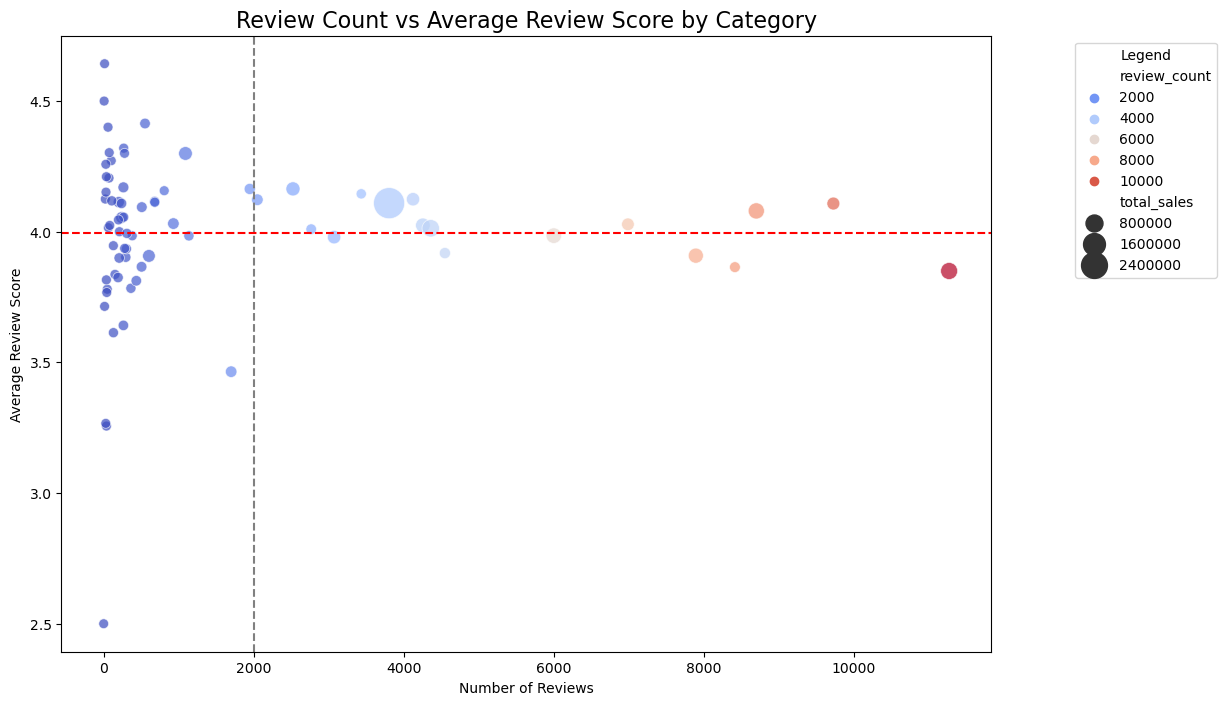

In [34]:
plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    x="review_count",
    y="average_review_score",
    size="total_sales",
    hue="review_count",
    data=bycategory_combined_df,
    sizes=(50, 500),
    alpha=0.7,
    palette="coolwarm"
)


plt.axvline(2000, color='gray', linestyle='--', linewidth=1.5, label='Review Count = 2000')


plt.axhline(
    y=bycategory_combined_df['average_review_score'].mean(),
    color='red',
    linestyle='--',
    linewidth=1.5,
    label='Average Rating'
)


plt.title("Review Count vs Average Review Score by Category", fontsize=16)
plt.xlabel("Number of Reviews")
plt.ylabel("Average Review Score")


handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles=handles[:10],
    labels=labels[:10], 
    title="Legend",
    loc="upper right",
    bbox_to_anchor=(1.25, 1)
)

plt.show()


### Question 2: Apa faktor-faktor yang paling berpengaruh terhadap total penjualan produk, berdasarkan harga, ulasan, dan kategori produk?

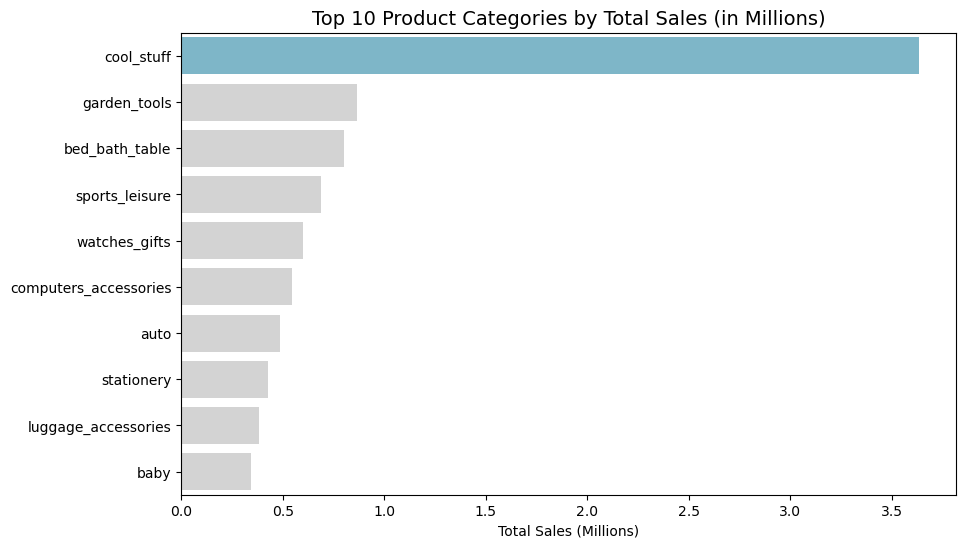

In [35]:
top_sales_categories = bycategory_combined_df.sort_values(by='total_sales', ascending=False).head(10)
top_sales_categories['total_sales_millions'] = top_sales_categories['total_sales'] / 1_000_000

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 6))
sns.barplot(
    x="total_sales_millions",
    y="product_category_name",
    data=top_sales_categories,
    palette=colors_
)
plt.title("Top 10 Product Categories by Total Sales (in Millions)", fontsize=14)
plt.xlabel("Total Sales (Millions)")
plt.ylabel(None)
plt.show()


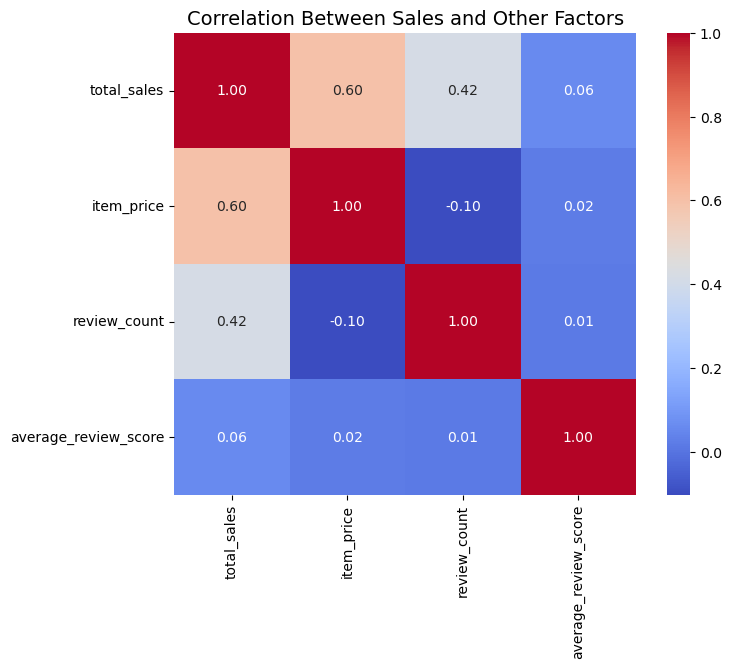

In [36]:
plt.figure(figsize=(8, 6))
correlation_matrix = bycategory_combined_df[["total_sales", "item_price", "review_count", "average_review_score"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Between Sales and Other Factors", fontsize=14)
plt.show()


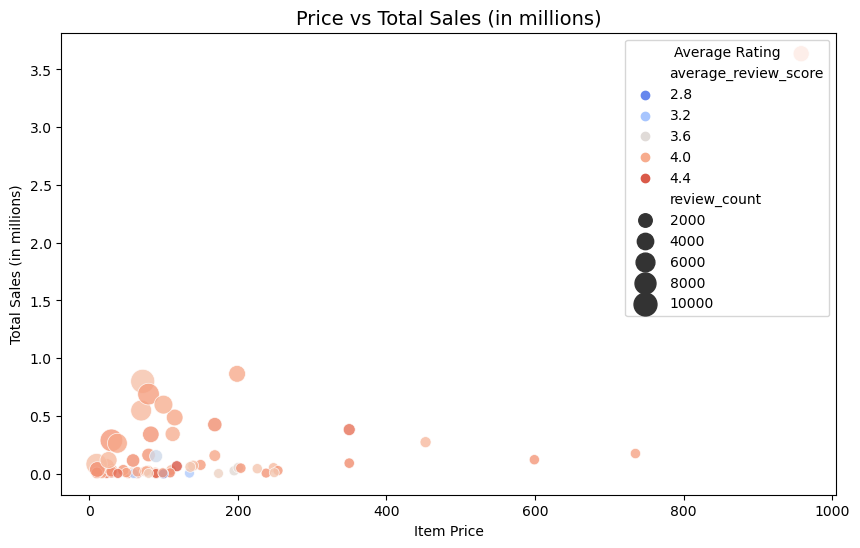

In [37]:
bycategory_combined_df['total_sales'] = pd.to_numeric(bycategory_combined_df['total_sales'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="item_price",
    y=bycategory_combined_df["total_sales"] / 1_000_000,
    size="review_count",
    hue="average_review_score",
    data=bycategory_combined_df,
    sizes=(50, 300),
    alpha=0.8,
    palette="coolwarm"
)
plt.title("Price vs Total Sales (in millions)", fontsize=14)
plt.xlabel("Item Price")
plt.ylabel("Total Sales (in millions)")
plt.legend(title="Average Rating", loc="upper right")
plt.show()

## Analisis Lanjutan

In [38]:
rating_bins = [0, 2, 4, 5]
rating_labels = ['Low', 'Medium', 'High']
bycategory_combined_df['rating_cluster'] = pd.cut(bycategory_combined_df['average_review_score'], bins=rating_bins, labels=rating_labels)

sold_count_bins = [0, 500, 5000, float('inf')]
sold_count_labels = ['Low', 'Medium', 'High']
bycategory_combined_df['sold_count_cluster'] = pd.cut(bycategory_combined_df['sold_count'], bins=sold_count_bins, labels=sold_count_labels)

print(bycategory_combined_df[['product_category_name', 'rating_cluster', 'sold_count_cluster']].head())

        product_category_name rating_cluster sold_count_cluster
0  agro_industry_and_commerce         Medium                Low
1            air_conditioning         Medium                Low
2                         art         Medium                Low
3       arts_and_craftmanship           High                Low
4                       audio         Medium                Low


In [39]:
cluster_summary = bycategory_combined_df.groupby(['rating_cluster', 'sold_count_cluster']).agg({
    'sold_count': 'sum',
    'review_count': 'sum',
    'total_sales': 'sum'
}).reset_index()

print(cluster_summary)

  rating_cluster sold_count_cluster  sold_count  review_count  total_sales
0            Low                Low           0             0         0.00
1            Low             Medium           0             0         0.00
2            Low               High           0             0         0.00
3         Medium                Low        3879          3892    427204.02
4         Medium             Medium       11545         11574    992335.87
5         Medium               High       33267         33580   2029033.71
6           High                Low        2667          2682    557152.65
7           High             Medium       34390         34534   6876490.20
8           High               High       25275         25416   1242620.40


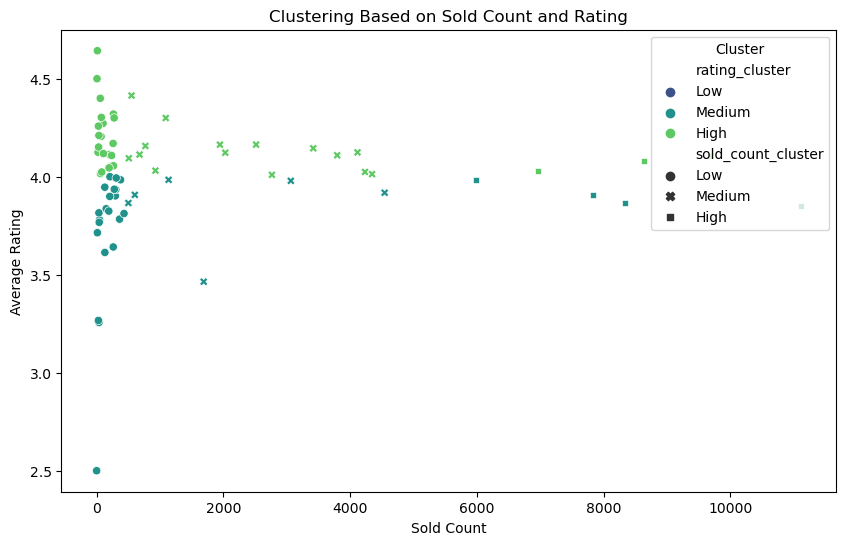

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sold_count', y='average_review_score', hue='rating_cluster', style='sold_count_cluster', data=bycategory_combined_df, palette='viridis')

plt.title('Clustering Based on Sold Count and Rating')
plt.xlabel('Sold Count')
plt.ylabel('Average Rating')
plt.legend(title='Cluster', loc='upper right')
plt.show()

### Kesimpulan Clustering Berdasarkan Penjualan dan Rating:  
Berdasarkan analisis clustering, kategori dengan penjualan tinggi memiliki rentang rating yang relatif sempit, artinya rating antar produk dalam kategori ini tidak terlalu bervariasi. Sementara itu, kategori dengan penjualan rendah menunjukkan perbedaan yang lebih besar dalam rating, dengan beberapa produk memiliki rating yang sangat tinggi dan lainnya sangat rendah. Ini mengindikasikan bahwa meskipun penjualan rendah, perbedaan persepsi pelanggan terhadap kualitas produk dalam kategori tersebut cukup besar.


## Conclusion

### Q 1:  
Hubungan antara rating produk dan kategori produk menunjukkan bahwa kategori dengan ulasan lebih dari 2000 memiliki rating yang lebih konsisten, sementara kategori dengan ulasan kurang dari 2000 cenderung memiliki rating yang lebih bervariasi. Beberapa kategori produk memiliki rating lebih tinggi daripada yang lain, tergantung pada jumlah ulasan yang diterima.

### Q 2:  
Faktor yang paling berpengaruh terhadap total penjualan adalah harga, jumlah ulasan, dan kategori produk. Produk dengan lebih banyak ulasan cenderung memiliki penjualan lebih tinggi. Harga juga berperan, namun kategori tertentu, seperti "cool_stuff", menunjukkan performa penjualan yang signifikan meski dengan harga atau jumlah ulasan yang lebih rendah.


In [43]:
# Menyimpan DataFrame dalam CSV untuk membuat dashboard dengan SteramLit

byproduct_combined_df.to_csv('byproduct_combined_data.csv', index=False)

bycategory_combined_df.to_csv('bycategory_combined_data.csv', index=False)